### `nltk` library for Natural Language Processing

In [1]:
import nltk

In [4]:
# nltk.download_shell()

In [3]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mohamadjafari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Reading in the file
Reading each line of the file are striping any trailing spaces with `str.rstrip()`

In [5]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [6]:
print(len(messages))

5574


#### Checking out a single line

In [13]:
messages[:10]

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham\tOk lar... Joking wif u oni...',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham\tU dun say so early hor... U c already then say...',
 "ham\tNah I don't think he goes to usf, he lives around here though",
 "spam\tFreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",
 'ham\tEven my brother is not like to speak with me. They treat me like aids patent.',
 "ham\tAs per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'spam\tWINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Cl

In [8]:
messages[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [19]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print()

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

1 ham	Ok lar... Joking wif u oni...

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

3 ham	U dun say so early hor... U c already then say...

4 ham	Nah I don't think he goes to usf, he lives around here though

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

6 ham	Even my brother is not like to speak with me. They treat me like aids patent.

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. V

### Making a DataFrame for easier view

In [20]:
import pandas as pd

In [21]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                      names=['label', 'message'])

In [22]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


### Statistics for 'ham' and 'spam' category messages

In [11]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

##### Adding the length of each message to the DataFrame

In [23]:
messages['length'] = messages['message'].apply(len)

In [24]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Checking out the distribution of message lengths

<AxesSubplot:>

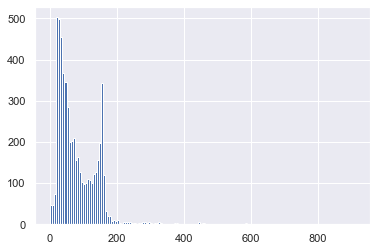

In [27]:
sns.set()
messages['length'].hist(bins=150)

In [16]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

##### Checking the highest length message

In [28]:
messages[messages['length'] == 910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [30]:
messages[messages['length'] == 910]['message']

1085    For me the love should start with attraction.i...
Name: message, dtype: object

In [18]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

##### Checking the distribution of message lengths for 'ham' and 'spam' type messages

<AxesSubplot:xlabel='length', ylabel='Count'>

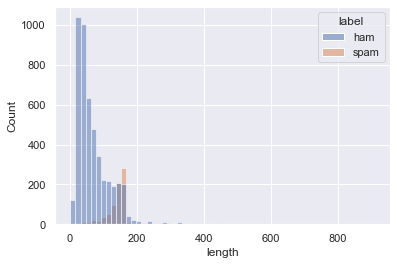

In [35]:
sns.histplot(data=messages, x='length',hue='label', bins=60)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0AB978B0>,
      dtype=object)

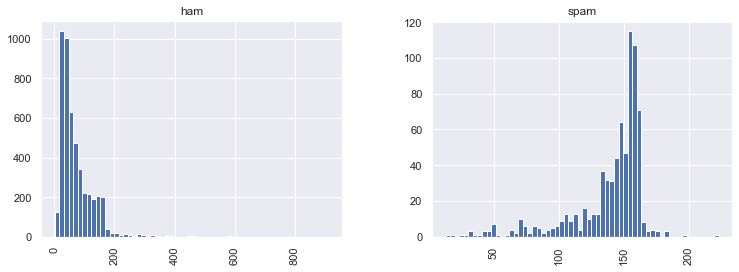

In [19]:
messages.hist(column='length', by='label', bins=60, figsize=(12, 4))

## Starting to break down the message to make a wordcount vector
A function to split a message into its individual words and return a list

In [37]:
import string

In [38]:
mess = 'Sample message! Notice: it has punctuation.'

##### Removing punctuation and other undesirable characters

In [39]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
nonpunc = [c for c in mess if c not in string.punctuation]

##### The message after removing these characters
We will join this message later on . . .

In [46]:
'sa;am ddd'.split()

['sa;am', 'ddd']

In [41]:
nonpunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [54]:
''.join(nonpunc)

'Sample message Notice it has punctuation'

### Stopwords
___'Stopwords'___ are words in a language that are so common (sometimes fundamental to the language) that they don't contibute to finding relevant patterns in the text. In this case, these words don't help us in any way to differentiate between 'spam' and 'ham' emails.

In [47]:
from nltk.corpus import stopwords

In [51]:
stopwords.words('english')[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

##### Joining
We can join multiple strings seperated by a character. In this case `''` or the empty string

In [56]:
chars = ['a', 'b', 'c', 'd']
''.join(chars)

'abcd'

In [57]:
nonpunc = ''.join(nonpunc)
nonpunc

'Sample message Notice it has punctuation'

In [58]:
nonpunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

### Filtering the relevant words
We are taking each for in the `split` message, taking its `lower`case and adding if its NOT in the list of stopwords of the English language.

In [59]:
clean_mess = [word for word in nonpunc.split() if word.lower() not in stopwords.words('english')]

Word list after filtering stopwords

In [60]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

### A function to do these steps for any message

In [64]:
def text_process(mess):
    """
    A function that takes in a text message, and returns the word list excluding stopwords (words that are too common or that dont conribute to pattern finding).
    
    Steps of function operations:
    -----------------------------
    1. Remove punctuations.
    2. Remove stopwords.
    3. Return list of clean text words.
    """
    # Removing 
    nonpunc = [char for char in mess if char not in string.punctuation]

    nonpunc = "".join(nonpunc)
    
    clean_list = [word for word in nonpunc.split() if word.lower() not in stopwords.words('english')]
    
    return clean_list

##### Testing our text processing function

In [65]:
mess

'Sample message! Notice: it has punctuation.'

In [66]:
text_process(mess)

['Sample', 'message', 'Notice', 'punctuation']

#### Checking the head of our DataFrame

In [67]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [36]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

### Making a count vectorizer

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

bow = bag of words

In [69]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

CountVectorizer(analyzer=<function text_process at 0x7fa0b812ff70>)

In [73]:
print("Total number of words in our vocabulary:", len(bow_transformer.vocabulary_))

Total number of words in our vocabulary: 11425


Taking one sample message and transforming it into a bag of words

In [77]:
mess4 = messages['message'][3]
print(mess4)

U dun say so early hor... U c already then say...


In [78]:
bow4 = bow_transformer.transform([mess4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [79]:
print(bow4.shape)

(1, 11425)


In [80]:
bow_transformer.get_feature_names()[4068]

/Users/mohamadjafari/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


'U'

In [81]:
bow_transformer.get_feature_names()[9554]

'say'

In [82]:
messages_bow = bow_transformer.transform(messages['message'])

In [83]:
print("Shape of Sparse Matrix", messages_bow.shape)

Shape of Sparse Matrix (5572, 11425)


In [111]:
import numpy as np
a=messages_bow.todense()[50]
A = np.array(a.T)
A[A==[1]]

array([1, 1, 1, 1, 1])

In [112]:
messages_bow.nnz

50548

In [47]:
# Calculating sparcity
sparcity = (100.0 * messages_bow.nnz / messages_bow.shape[0] * messages_bow.shape[1])
print('Sparcity: {}'.format(sparcity))

Sparcity: 10364517.229002154


In [48]:
from sklearn.feature_extraction.text import TfidfTransformer

In [50]:
tf_idf_transformer = TfidfTransformer().fit(messages_bow)

Trying it on a single message

In [51]:
tf_idf4 = tf_idf_transformer.transform(bow4)
print(tf_idf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


Checking document frequency of ___'university'___

In [52]:
tf_idf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [53]:
messages_tf_idf = tf_idf_transformer.transform(messages_bow)

### Naive Bayes
Using ___Naive Bayes___ as our classifier for detecting __'spam'__ and __'ham'__ messages.

In [54]:
from sklearn.naive_bayes import MultinomialNB

In [55]:
spam_detect_model = MultinomialNB().fit(messages_tf_idf, messages['label'])

Testing our spam detector model on a single message

In [56]:
spam_detect_model.predict(tf_idf4)[0]

'ham'

In [57]:
messages['label'][3]

'ham'

Making predictions for all data

In [58]:
all_preds = spam_detect_model.predict(messages_tf_idf)

In [59]:
all_preds

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

# Doing things the Sklearn way
Now that we have broken down the steps of text processing and spam detection, we will do the same but in a much more formal and efficient manner.

### Train Test Split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# X
msg = messages['message']
# Y
label = messages['label']
# Train Test Split
msg_train, msg_test, label_train, label_test = train_test_split(msg, label, test_size=0.3)

### Making a data Pipeline

In [62]:
from sklearn.pipeline import Pipeline

A pipeline allows us to repeat all the steps that we previously defined in a much more simple and more efficiently repeatable way. We simply pass in the names of the step or process and the functions to apply on X_train as a pair of values in a tuple. Each tuple in the list represents a single step.

In [63]:
pipeline = Pipeline([
    # Creating a vector of word counts for each message
    ('bow', CountVectorizer(analyzer=text_process)),
    # Making a tf-idf transformation
    ('tf_idf', TfidfTransformer()),
    # Making the prediction using Multinomial Naive Bayes classifier
    ('classifier', MultinomialNB())
])

Training our model (with all pre-processing steps)

In [64]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0A632468>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tf_idf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

Making predictions

In [65]:
predictions = pipeline.predict(msg_test)

Evaluating our model predictions

In [66]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1449
        spam       1.00      0.73      0.84       223

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.96      0.96      1672

